# NTLK WITH SENTIMENT (TASK 56)

In [1]:
import numpy as np

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
import nltk 
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [9]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
from subprocess import check_output

In [11]:
data=pd.read_csv(r"Sentiment.csv")
data

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,07-08-2015 09:54,6.296970e+17,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,07-08-2015 09:54,6.296970e+17,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,07-08-2015 09:54,6.296970e+17,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,07-08-2015 09:54,6.296970e+17,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,07-08-2015 09:54,6.296970e+17,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,07-08-2015 09:29,6.296910e+17,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,07-08-2015 09:25,6.296900e+17,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,07-08-2015 07:19,6.296580e+17,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,07-08-2015 09:54,6.296970e+17,NaN,NaN


In [12]:
data=data[['text','sentiment']]
data

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


## Splitting data into train and test split

In [13]:
train,test=train_test_split(data, test_size=0.1)
train.head()

,text,sentiment
713,RT @SpudLovr: Fetus dies in womb after 20 week...,Negative
2379,Changed my mind @GOP Bomb whoever you want to....,Negative
12998,Not the pimps and drug dealers #GOPDebates,Neutral
3337,It may have been the #GOPDebate but @HillaryCl...,Positive
6298,"Rick Santorum brings full crazy to #GOPDebate,...",Negative


In [14]:
# Removing neutral sentiments

In [15]:
train=train[train.sentiment != 'Neutral']
train

,text,sentiment
713,RT @SpudLovr: Fetus dies in womb after 20 week...,Negative
2379,Changed my mind @GOP Bomb whoever you want to....,Negative
3337,It may have been the #GOPDebate but @HillaryCl...,Positive
6298,"Rick Santorum brings full crazy to #GOPDebate,...",Negative
3765,"@IngrahamAngle ""@CarlyFiorina ran away with it...",Negative
...,...,...
3283,RT @_ErikaHarold: Dr. Carson's closing stateme...,Positive
4110,RT @SooperMexican: Aww 100% support among cute...,Positive
6469,RT @VINNYGUADAGNINO: Bro Donald Trump has to s...,Positive
4828,".@ppact can sell baby parts for profit, or wha...",Positive


### Separate +ve and -ve tweets

In [17]:
train_pos=train[train['sentiment']=='Positive']
# It gives only text
train_pos=train_pos['text']

train_neg=train[train['sentiment']=='Negative']
train_neg=train_neg['text']

In [18]:
train_pos.head()

3337     It may have been the #GOPDebate but @HillaryCl...
8176     RT @Lrihendry: #TedCruz As President, I will a...
7029                       Loved the first #GOPdebate 🎉🎉🇺🇸
13832    Yes, and Moe was the smartest Stooge\n#Democra...
11626    RT @RWSurferGirl: Ask Trump a legitimate quest...
Name: text, dtype: object

In [19]:
train_neg.head()

713     RT @SpudLovr: Fetus dies in womb after 20 week...
2379    Changed my mind @GOP Bomb whoever you want to....
6298    Rick Santorum brings full crazy to #GOPDebate,...
3765    @IngrahamAngle "@CarlyFiorina ran away with it...
9767    RT @RWSurferGirl: I need to order another gree...
Name: text, dtype: object

### Clean text from hastags, mentions and links

Positive words


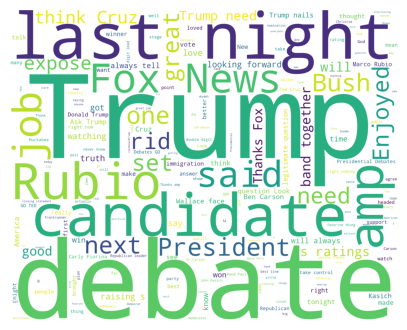

In [23]:
def wordcloud_draw(data,color='black'):
    words=' '.join(data)
    cleaned_words=" ".join([word for word in words.split()
                           if 'http' not in word
                           and not word.startswith('@')
                           and not word.startswith('#')
                           and word != 'RT'])
    wordcloud=WordCloud(stopwords=STOPWORDS,
                       background_color=color,
                       width=2500,height=2000).generate(cleaned_words)
    plt.figure(1,figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis('off')

print('Positive words')
wordcloud_draw(train_pos,'white')

Negative words


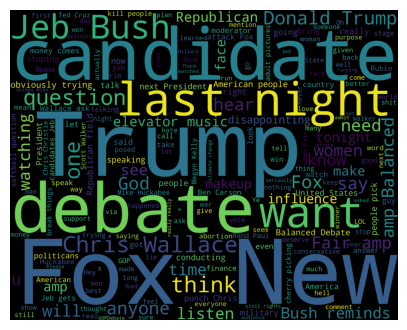

In [24]:
print('Negative words')
wordcloud_draw(train_neg)

In [28]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [29]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

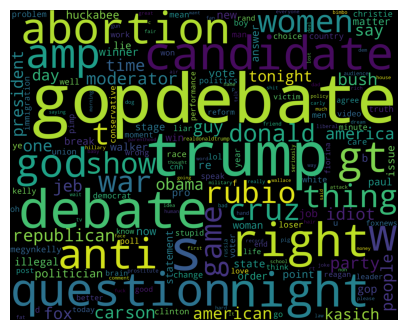

In [30]:
wordcloud_draw(w_features)

In [39]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [40]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 864/826 
[Positive]: 226/68 
